In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# key colors
paton_dark_blue = '#000080'
paton_teal_blue = '#376e8f'
paton_skyish_blue = '#529cbe'
paton_pale_blue = '#9dc2d9'
paton_dark_green = '#5c8625'
paton_light_green = '#c2d9a5'
paton_pale_green = '#d9e7c6'

paton_bright_red = '#fa0004'
paton_maroon = '#98002d'
paton_hot_pink = '#d00d44'
paton_pale_pink = '#f9cbd5'
paton_grey1 = '#b9b0a6'
paton_grey2 = '#d8d0c7'
paton_grey3 = '#f0ece7'

paton_blue = '#4865a2'
paton_dark_grey = '#808080'
paton_teal = '#127b8a'
paton_light_grey = '#bebebe'

In [7]:
# organizing pre-CENSO energies
crest_05 = pd.read_csv('data/buohnah_conf_sampling/goodvibes_crest_05.csv',header=12).drop(columns=['Unnamed: 9'], axis=1).dropna()
crest_10 = pd.read_csv('data/buohnah_conf_sampling/goodvibes_crest_10.csv',header=12).drop(columns=['Unnamed: 9'], axis=1).dropna()
crest_15 = pd.read_csv('data/buohnah_conf_sampling/goodvibes_crest_15.csv',header=12).drop(columns=['Unnamed: 9'], axis=1).dropna()
crest_20 = pd.read_csv('data/buohnah_conf_sampling/goodvibes_crest_20.csv',header=12).drop(columns=['Unnamed: 9'], axis=1).dropna()

crest_gibbs_05 = crest_05['qh-G(T)_SPC']
crest_gibbs_10 = crest_10['qh-G(T)_SPC']
crest_gibbs_15 = crest_15['qh-G(T)_SPC']
crest_gibbs_20 = crest_20['qh-G(T)_SPC']

crest_gibbs_all = pd.DataFrame.from_dict({'5_crest': crest_gibbs_05, '10_crest': crest_gibbs_10, '15_crest': crest_gibbs_15, '20_crest': crest_gibbs_20}, orient='index').T

In [10]:
# oraganizing post-CENSO energies
buohnah_censo_05 = pd.read_csv('data/buohnah_conf_sampling/goodvibes_censo_05.csv',header=12).drop(columns=['Unnamed: 9'], axis=1).dropna()
buohnah_censo_10 = pd.read_csv('data/buohnah_conf_sampling/goodvibes_censo_10.csv',header=12).drop(columns=['Unnamed: 9'], axis=1).dropna()
buohnah_censo_15 = pd.read_csv('data/buohnah_conf_sampling/goodvibes_censo_15.csv',header=12).drop(columns=['Unnamed: 9'], axis=1).dropna()
buohnah_censo_20 = pd.read_csv('data/buohnah_conf_sampling/goodvibes_censo_20.csv',header=12).drop(columns=['Unnamed: 9'], axis=1).dropna()

censo_gibbs_05 = buohnah_censo_05['qh-G(T)_SPC']
censo_gibbs_10 = buohnah_censo_10['qh-G(T)_SPC']
censo_gibbs_15 = buohnah_censo_15['qh-G(T)_SPC']
censo_gibbs_20 = buohnah_censo_20['qh-G(T)_SPC']

gibbs_with_censo = pd.DataFrame.from_dict({'5_crest': crest_gibbs_05, '10_crest': crest_gibbs_10, '15_crest': crest_gibbs_15, '20_crest': crest_gibbs_20, 
                                              '5_censo': censo_gibbs_05, '10_censo': censo_gibbs_10, '15_censo': censo_gibbs_15, '20_censo': censo_gibbs_20}, 
                                              orient='index').T
# converting to kcal/mol
censo_gibbs_kcal = gibbs_with_censo.multiply(627.5)

# finding relative energies
total_min = min(censo_gibbs_kcal.min())
gibbs_censo_dup_kcal_rel = censo_gibbs_kcal - total_min

Text(0.5, 0, 'Clustered Set')

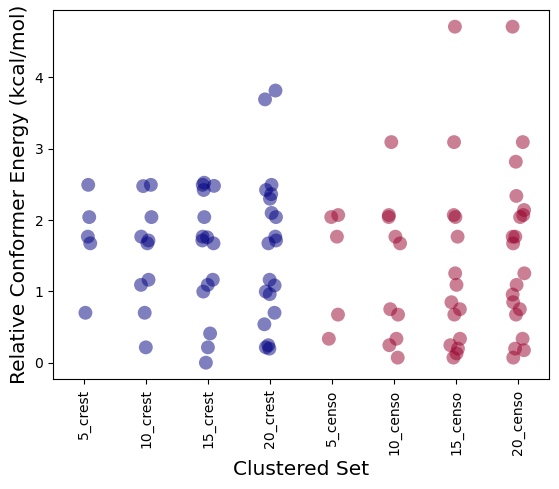

In [11]:
colors = [paton_dark_blue,paton_dark_blue,paton_dark_blue,paton_dark_blue,
          paton_maroon,paton_maroon,paton_maroon,paton_maroon]

# sns.stripplot(data=gibbs_censo_dup_kcal_rel, size=10, color="#1E4D2B")

sns.stripplot(data=gibbs_censo_dup_kcal_rel, size=10, palette=colors, alpha=0.50, edgecolor=colors)

plt.yticks(fontsize=10)
plt.xticks(rotation='vertical', fontsize=10)
plt.ylabel('Relative Conformer Energy (kcal/mol)', fontsize=14.5)
plt.xlabel('Clustered Set', fontsize=14.5)
# plt.title('BuOHNAH Clustering Energies')

# plt.savefig('buohnah_censo_crest_cluster.svg', dpi=400, bbox_inches='tight')